In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import AMM_sim_functions as sim

In [2]:
# Market Parameters

T = 1 # Time horizon
N = 1440 # Number of periods
dt = T/N # Time increment
buy = 2500.*dt # Constant trade size for systematic buyers
sell = -2500.*dt # Constant trade size for systematic sellers
eta0 = 0.005 # CEX proportional cost
eta1 = 0.0025 # CPMM proportional cost
X = 30000000 # Initial CPMM Dollar Reserves
Y = 10000 # Initial CPMM Asset Reserves
S = X/Y # Initial CEX Price
sigma = 0.05 # Standard deviation of CEX price shock
mu = 0  # Mean of CEX price shock
M = 1 # Total number of sims
time = np.array([i * dt for i in range(N+1)]) # Time grid

In [3]:
# Run Simulation

S0 = sim.CEX_Price(S, mu, sigma, dt, N, M) # Generate price series

filtr_bfs , filtr_sfs =  sim.generate_trade_filters(N, M) # Generate buyer-first/seller-first trade filter

X_reserves, Y_reserves, ref_price, amm_price, buy_rev, sell_rev, arb_rev, hedge_val = \
                        sim.simulation(M, N, T, dt, buy, sell, eta0, eta1, S0, X, Y, filtr_bfs, filtr_sfs) # Market simulation

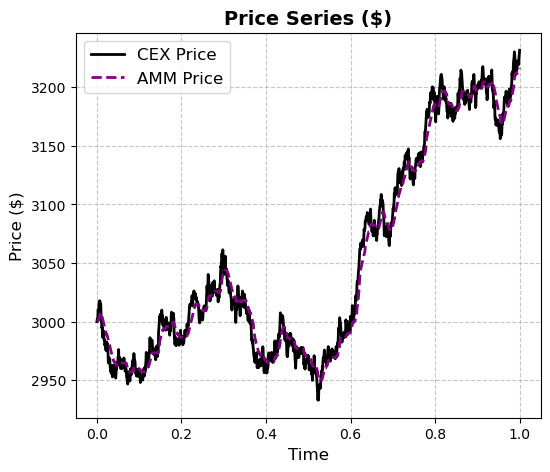

In [4]:
# Plot CEX price and AMM price
plt.figure(figsize=(6, 5)) # Set figure size
plt.plot(time, ref_price, color="black", linestyle="-", linewidth=2, label="CEX Price") 
plt.plot(time, amm_price, color="purple", linestyle="--", linewidth=2, label="AMM Price") 

# Title and labels
plt.title("Price Series ($)", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)

# Legend
plt.legend(loc="best", fontsize=12)

# Grid
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()


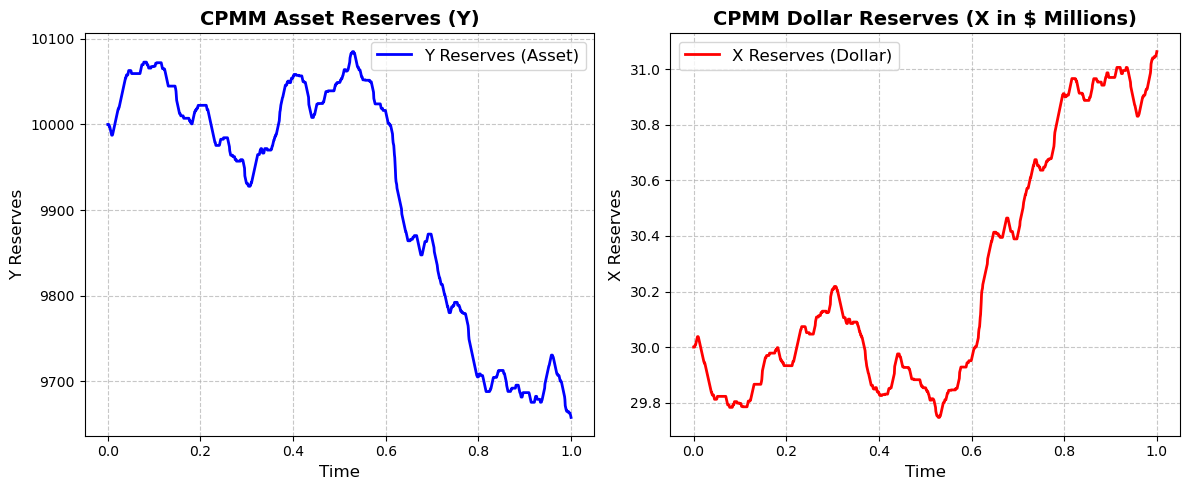

In [5]:
# Create a figure with two subplots (one for Y_reserves, one for X_reserves)
plt.figure(figsize=(12, 5))

# Plot Y reserves (asset reserves)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(time, Y_reserves, color="blue", linestyle="-", linewidth=2, label="Y Reserves (Asset)")
plt.title("CPMM Asset Reserves (Y)", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Y Reserves", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Plot X reserves (dollar reserves)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(time, X_reserves/1000000, color="red", linestyle="-", linewidth=2, label="X Reserves (Dollar)")
plt.title("CPMM Dollar Reserves (X in $ Millions)", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("X Reserves", fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


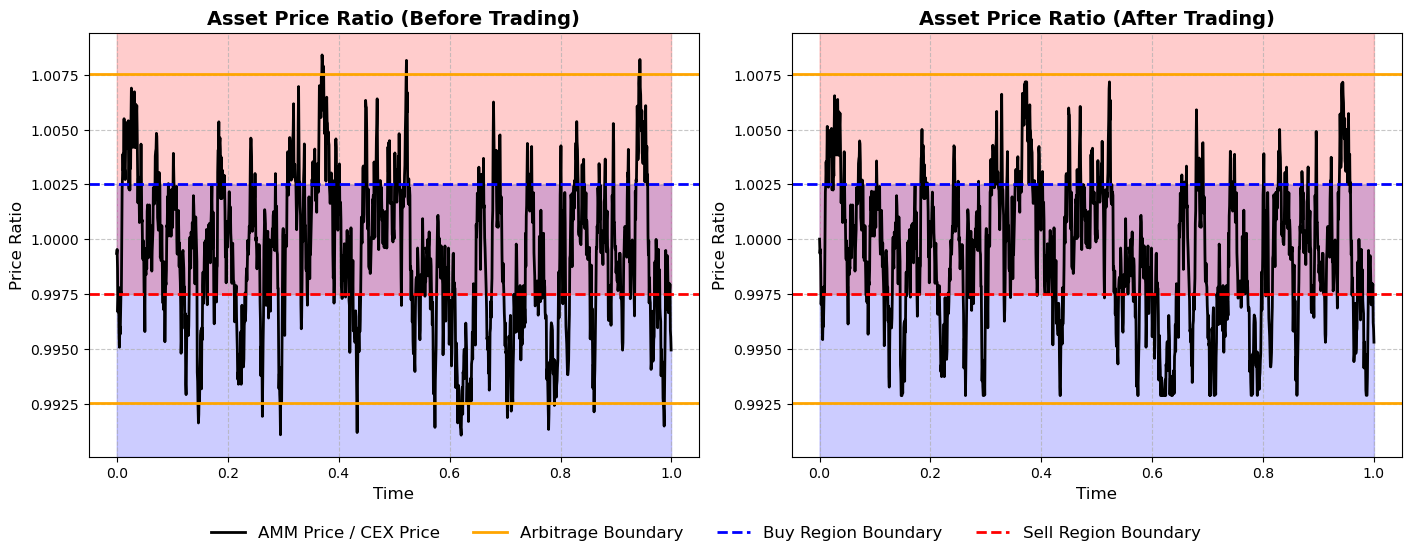

In [6]:
import matplotlib.pyplot as plt

# Compute the min and max values for consistent y-axis limits
y_min = min((amm_price[:-1] / ref_price[1:]).min(), (amm_price / ref_price).min(),
            (1 - eta1) / (1 + eta0), (1 - eta0) / (1 + eta1)) * 0.999  # Add a small margin
y_max = max((amm_price[:-1] / ref_price[1:]).max(), (amm_price / ref_price).max(),
            (1 - eta1) / (1 + eta0), (1 + eta0) / (1 - eta1)) * 1.001  # Add a small margin

# Define trader decision bounds for shading
lower_blue_bound = (1 + eta0) / (1 + eta1)  # Buy region
upper_red_bound = (1 - eta0) / (1 - eta1)  # Sell region

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

# ---- First Plot: Original Price Ratio ----
ax[0].plot(time[:-1], amm_price[:-1] / ref_price[1:], color="black", linestyle="-", linewidth=2, label="AMM Price / CEX Price")

# Add arbitrage bounds as horizontal lines
ax[0].axhline(y=(1 - eta1) / (1 + eta0), color='orange', linestyle='-', linewidth=2, label="Arbitrage Boundary")
ax[0].axhline(y=(1 + eta0) / (1 - eta1), color='orange', linestyle='-', linewidth=2)
ax[0].axhline(y=lower_blue_bound, color='b', linestyle='--', linewidth=2, label="Buy Region Boundary")
ax[0].axhline(y=upper_red_bound, color='r', linestyle='--', linewidth=2, label="Sell Region Boundary")

# Add shaded regions
ax[0].fill_between(time[:-1], y_min, lower_blue_bound, color='blue', alpha=0.2)  # Blue below lower bound (buy region)
ax[0].fill_between(time[:-1], upper_red_bound, y_max, color='red', alpha=0.2)   # Red above upper bound (sell region)

# Labels and formatting
ax[0].set_title("Asset Price Ratio (Before Trading)", fontsize=14, fontweight='bold')
ax[0].set_xlabel("Time", fontsize=12)
ax[0].set_ylabel("Price Ratio", fontsize=12)
ax[0].grid(True, linestyle="--", alpha=0.7)
ax[0].set_ylim(y_min, y_max) 

# ---- Second Plot: Price Ratio After Trading ----
ax[1].plot(time, amm_price / ref_price, color="black", linestyle="-", linewidth=2, label="")

# Add arbitrage bounds as horizontal lines
ax[1].axhline(y=(1 - eta1) / (1 + eta0), color='orange', linestyle='-', linewidth=2, label="")
ax[1].axhline(y=(1 + eta0) / (1 - eta1), color='orange', linestyle='-', linewidth=2)
ax[1].axhline(y=lower_blue_bound, color='b', linestyle='--', linewidth=2, label="")
ax[1].axhline(y=upper_red_bound, color='r', linestyle='--', linewidth=2, label="")

# Add shaded regions
ax[1].fill_between(time, y_min, lower_blue_bound, color='blue', alpha=0.2)  # Blue below lower bound (buy region)
ax[1].fill_between(time, upper_red_bound, y_max, color='red', alpha=0.2)   # Red above upper bound (sell region)

# Labels and formatting
ax[1].set_title("Asset Price Ratio (After Trading)", fontsize=14, fontweight='bold')
ax[1].set_xlabel("Time", fontsize=12)
ax[1].set_ylabel("Price Ratio", fontsize=12)
ax[1].grid(True, linestyle="--", alpha=0.7)
ax[1].set_ylim(y_min, y_max) 

# Move the legend below the plot
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.1), fontsize=12, ncol=4, frameon=False)

# Show the figure
plt.show()


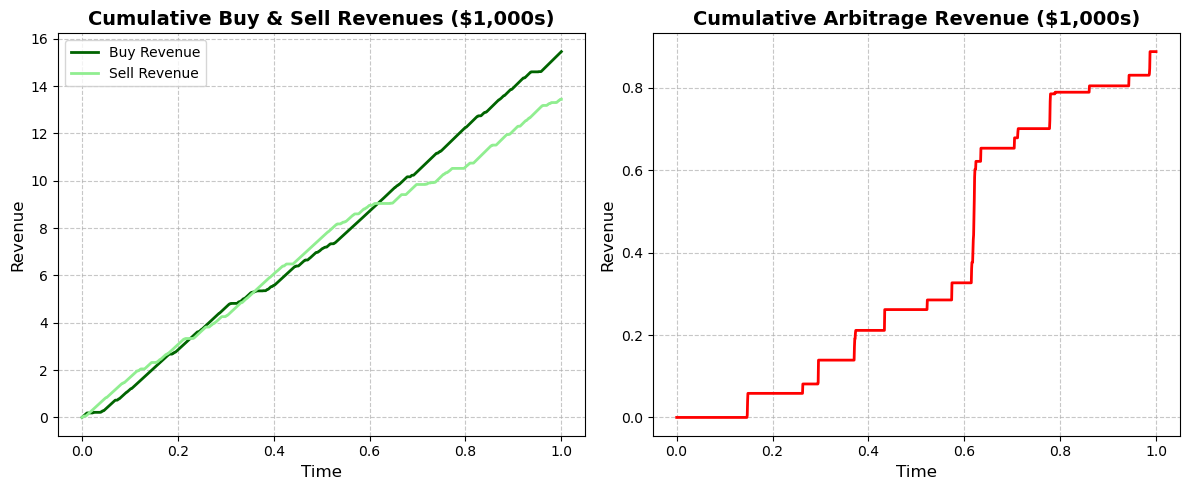

In [7]:
# Compute cumulative revenues
cumulative_buy_rev = np.cumsum(buy_rev)
cumulative_sell_rev = np.cumsum(sell_rev)
cumulative_arb_rev = np.cumsum(arb_rev)

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# ---- First Plot: Cumulative Buy and Sell Revenues ----
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(time, cumulative_buy_rev/1000, color="darkgreen", linestyle="-", linewidth=2, label="Buy Revenue")
plt.plot(time, cumulative_sell_rev/1000, color="lightgreen", linestyle="-", linewidth=2, label="Sell Revenue")

# Labels and formatting
plt.title("Cumulative Buy & Sell Revenues ($1,000s)", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# ---- Second Plot: Cumulative Arbitrage Revenue ----
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(time, cumulative_arb_rev/1000, color="red", linestyle="-", linewidth=2, label="Arbitrage Revenue")

# Labels and formatting
plt.title("Cumulative Arbitrage Revenue ($1,000s)", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure
plt.show()


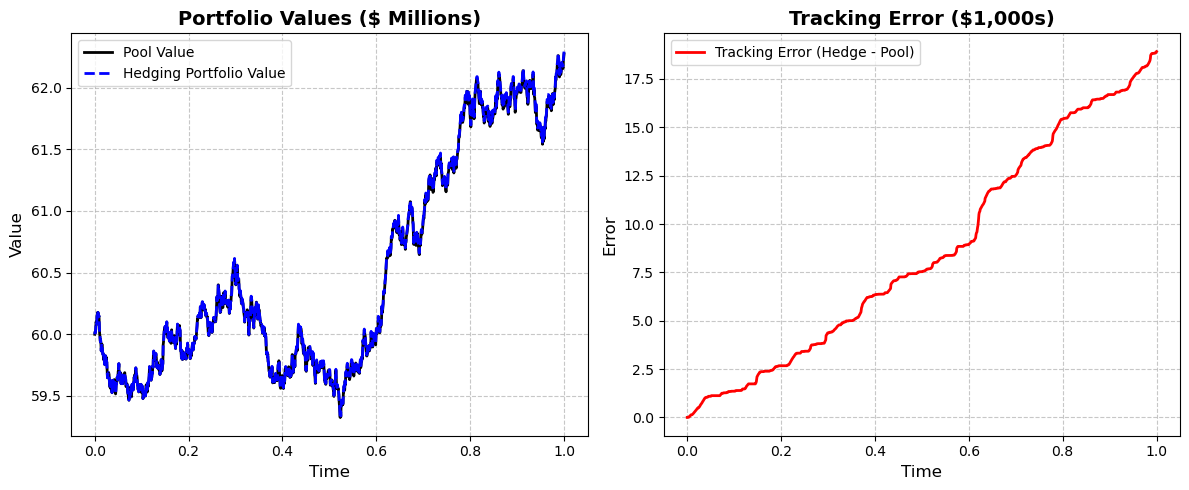

In [8]:
# Compute hedging portfolio value and tracking error
pool_value = X_reserves + Y_reserves * ref_price
hedge_err =  hedge_val - pool_value # Note: this will be non-decreasing

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# ---- First Plot: Hedging Portfolio Value ----
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(time, pool_value/1000000, color="black", linestyle="-", linewidth=2, label="Pool Value")
plt.plot(time, hedge_val/1000000, color="blue", linestyle="--", linewidth=2, label="Hedging Portfolio Value")

# Labels and formatting
plt.title("Portfolio Values ($ Millions)", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# ---- Second Plot: Tracking Error ----
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(time, hedge_err/1000, color="red", linestyle="-", linewidth=2, label="Tracking Error (Hedge - Pool)")

# Labels and formatting
plt.title("Tracking Error ($1,000s)", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure
plt.show()


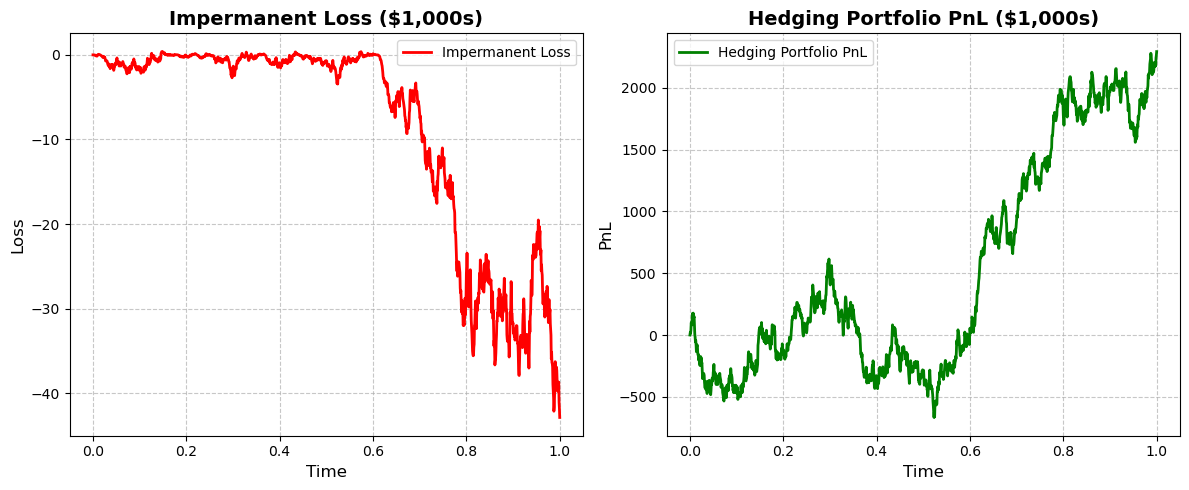

In [9]:
# Compute impermanent loss and hedging portfolio PnL
imp_loss = X_reserves + Y_reserves * ref_price - X_reserves[0] - Y_reserves[0] * ref_price
hedge_pnl = hedge_val - pool_value[0]

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# ---- First Plot: Impermanent Loss ----
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(time, imp_loss/1000, color="red", linestyle="-", linewidth=2, label="Impermanent Loss")

# Labels and formatting
plt.title("Impermanent Loss ($1,000s)", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# ---- Second Plot: Hedging Portfolio PnL ----
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(time, hedge_pnl/1000, color="green", linestyle="-", linewidth=2, label="Hedging Portfolio PnL")

# Labels and formatting
plt.title("Hedging Portfolio PnL ($1,000s)", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("PnL", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure
plt.show()


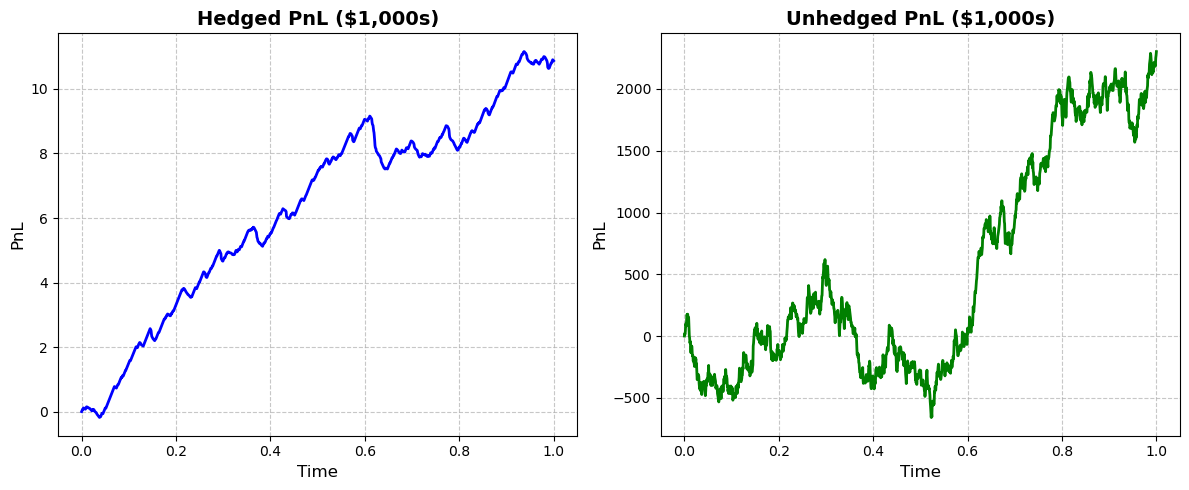

In [11]:
# Compute cumulative PnL for hedged and unhedged cases
pnl_hedged = np.cumsum(buy_rev + sell_rev + arb_rev) - hedge_err.squeeze()
pnl_unhedged = np.cumsum(buy_rev + sell_rev + arb_rev) + pool_value.squeeze() - pool_value[0][0]

# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# ---- First Plot: Hedged PnL ----
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(time, pnl_hedged/1000, color="blue", linestyle="-", linewidth=2, label="Hedged PnL")

# Labels and formatting
plt.title("Hedged PnL ($1,000s)", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("PnL", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# ---- Second Plot: Unhedged PnL ----
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(time, pnl_unhedged/1000, color="green", linestyle="-", linewidth=2, label="Unhedged PnL")

# Labels and formatting
plt.title("Unhedged PnL ($1,000s)", fontsize=14, fontweight='bold')
plt.xlabel("Time", fontsize=12)
plt.ylabel("PnL", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the figure
plt.show()
